In [1]:
from rustyspikes import *

In [2]:
model = load_model('models/apparent_2.pkl')

Loaded the following model:
{'Neurons': {0: <neurons.Spikes_at_will object at 0x000001AA9C69AA90>, 1: <neurons.Spikes_at_will object at 0x000001AA9C69AE50>, 2: <neurons.Spikes_at_will object at 0x000001AA9C69AED0>, 3: <neurons.Spikes_at_will object at 0x000001AA9C69AF50>, 4: <neurons.Spikes_at_will object at 0x000001AA9C69B010>, 5: <neurons.Izhikevich object at 0x000001AA9C69B1D0>, 6: <neurons.Izhikevich object at 0x000001AA9C69B2D0>, 7: <neurons.Izhikevich object at 0x000001AA9C69B3D0>, 8: <neurons.Izhikevich object at 0x000001AA9C69B4D0>, 9: <neurons.Izhikevich object at 0x000001AA9C69B5D0>, 10: <neurons.Izhikevich object at 0x000001AA9C69B6D0>, 11: <neurons.Izhikevich object at 0x000001AA9C69B7D0>, 12: <neurons.Izhikevich object at 0x000001AA9C69B8D0>, 13: <neurons.Izhikevich object at 0x000001AA9C69B9D0>, 14: <neurons.Izhikevich object at 0x000001AA9C69BAD0>}, 'Synapses': {(0, 5): <synaptics.Synapse object at 0x000001AA9C69BCD0>, (1, 6): <synaptics.Synapse object at 0x000001AA9C6B0

In [3]:
model[1].awaiting_time =99999999999
model[2].awaiting_time =99999999999
model[3].awaiting_time =99999999999

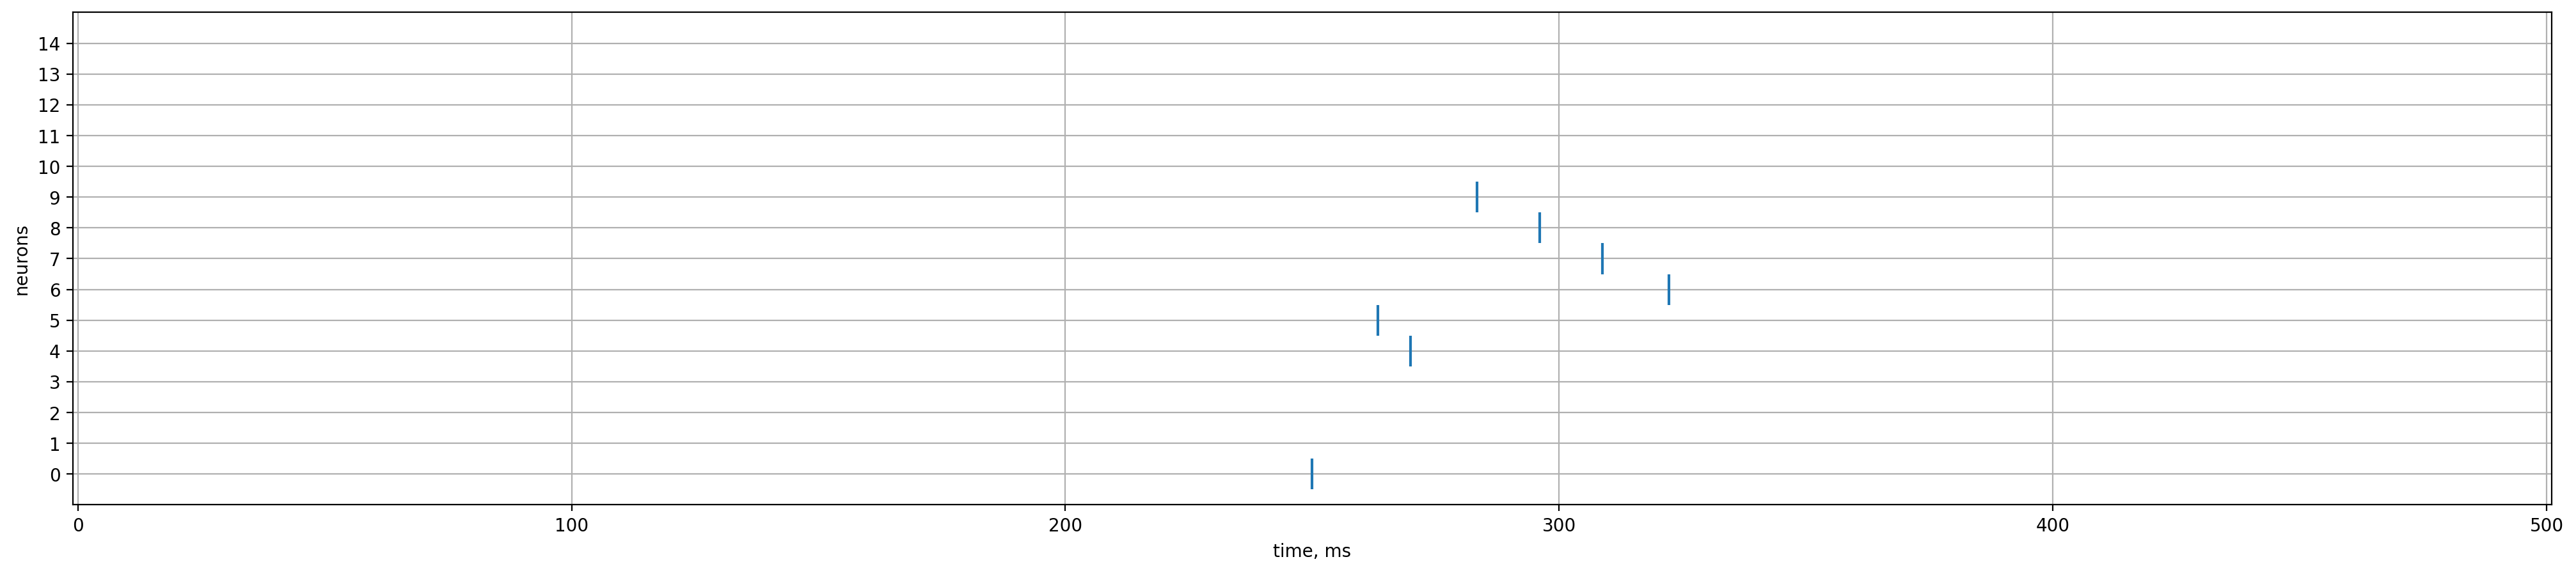

In [4]:
time = 500

# print(model[1].silenced)
model.syn_by_edge[1,6].w = 1
model.syn_by_edge[2,7].w = 1
model.syn_by_edge[3,8].w = 1
#model.set_scale(3.9)
model.set_rule_to_all(None)
reverse_signal(model)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

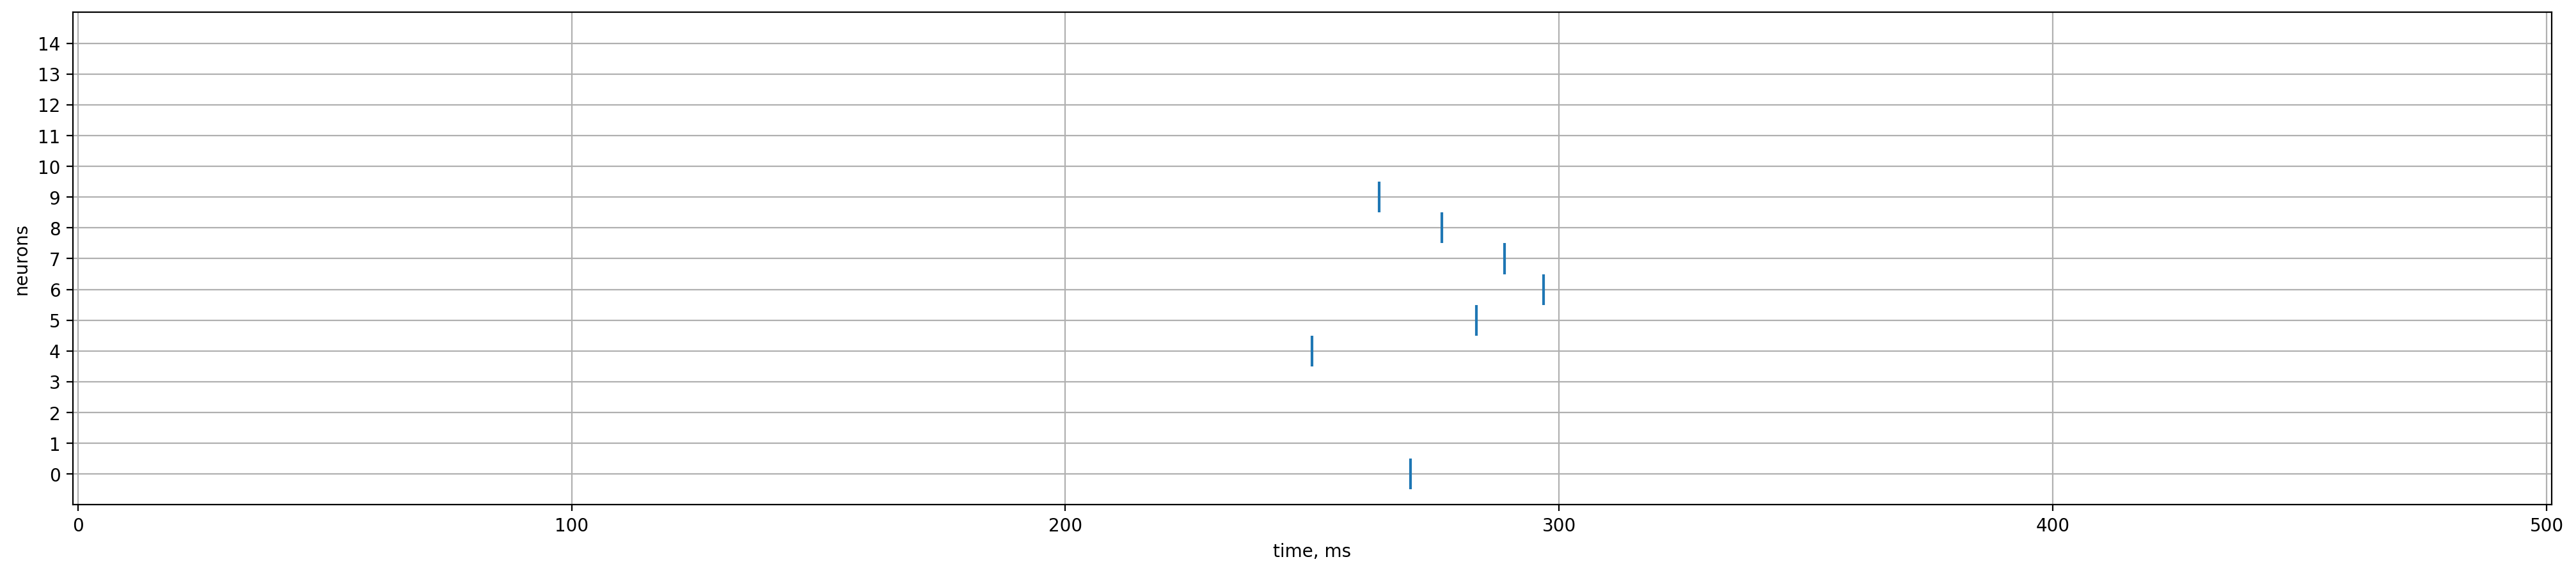

In [5]:
time = 500



model.syn_by_edge[1,6].w = 0
model.syn_by_edge[2,7].w = 0
model.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
model.set_rule_to_all(None)
reverse_signal(model)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

In [6]:
clone = clone_model(model)
clone.remove_neurons([11,12,13,14,10])

def switch_order(model, ids):
    a = model[ids[0]].awaiting_time
    b = model[ids[1]].awaiting_time
    model[ids[0]].awaiting_time = b
    model[ids[1]].awaiting_time = a

In [7]:
# model.show_config()
clone.show_config()

{'Neurons': {0: <neurons.Spikes_at_will at 0x1aa9c76e210>,
  1: <neurons.Spikes_at_will at 0x1aa9c7c0d10>,
  2: <neurons.Spikes_at_will at 0x1aa9c7cc190>,
  3: <neurons.Spikes_at_will at 0x1aa9c7cc690>,
  4: <neurons.Spikes_at_will at 0x1aa9c7cf590>,
  5: <neurons.Izhikevich at 0x1aa9c754ad0>,
  6: <neurons.Izhikevich at 0x1aa9c4e5e10>,
  7: <neurons.Izhikevich at 0x1aa9c6f8490>,
  8: <neurons.Izhikevich at 0x1aa9c6c35d0>,
  9: <neurons.Izhikevich at 0x1aa9c6c3550>},
 'Synapses': {(0, 5): <synaptics.Synapse at 0x1aa9c7c1690>,
  (1, 6): <synaptics.Synapse at 0x1aafaf99450>,
  (2, 7): <synaptics.Synapse at 0x1aa9c85a8d0>,
  (3, 8): <synaptics.Synapse at 0x1aa9c825850>,
  (4, 9): <synaptics.Synapse at 0x1aa9c8538d0>,
  (5, 6): <synaptics.Synapse at 0x1aa9c7f5c50>,
  (6, 5): <synaptics.Synapse at 0x1aa9c843f10>,
  (6, 7): <synaptics.Synapse at 0x1aaa09a7b90>,
  (7, 6): <synaptics.Synapse at 0x1aa9c883750>,
  (7, 8): <synaptics.Synapse at 0x1aaa09ba050>,
  (8, 7): <synaptics.Synapse at 0x1a

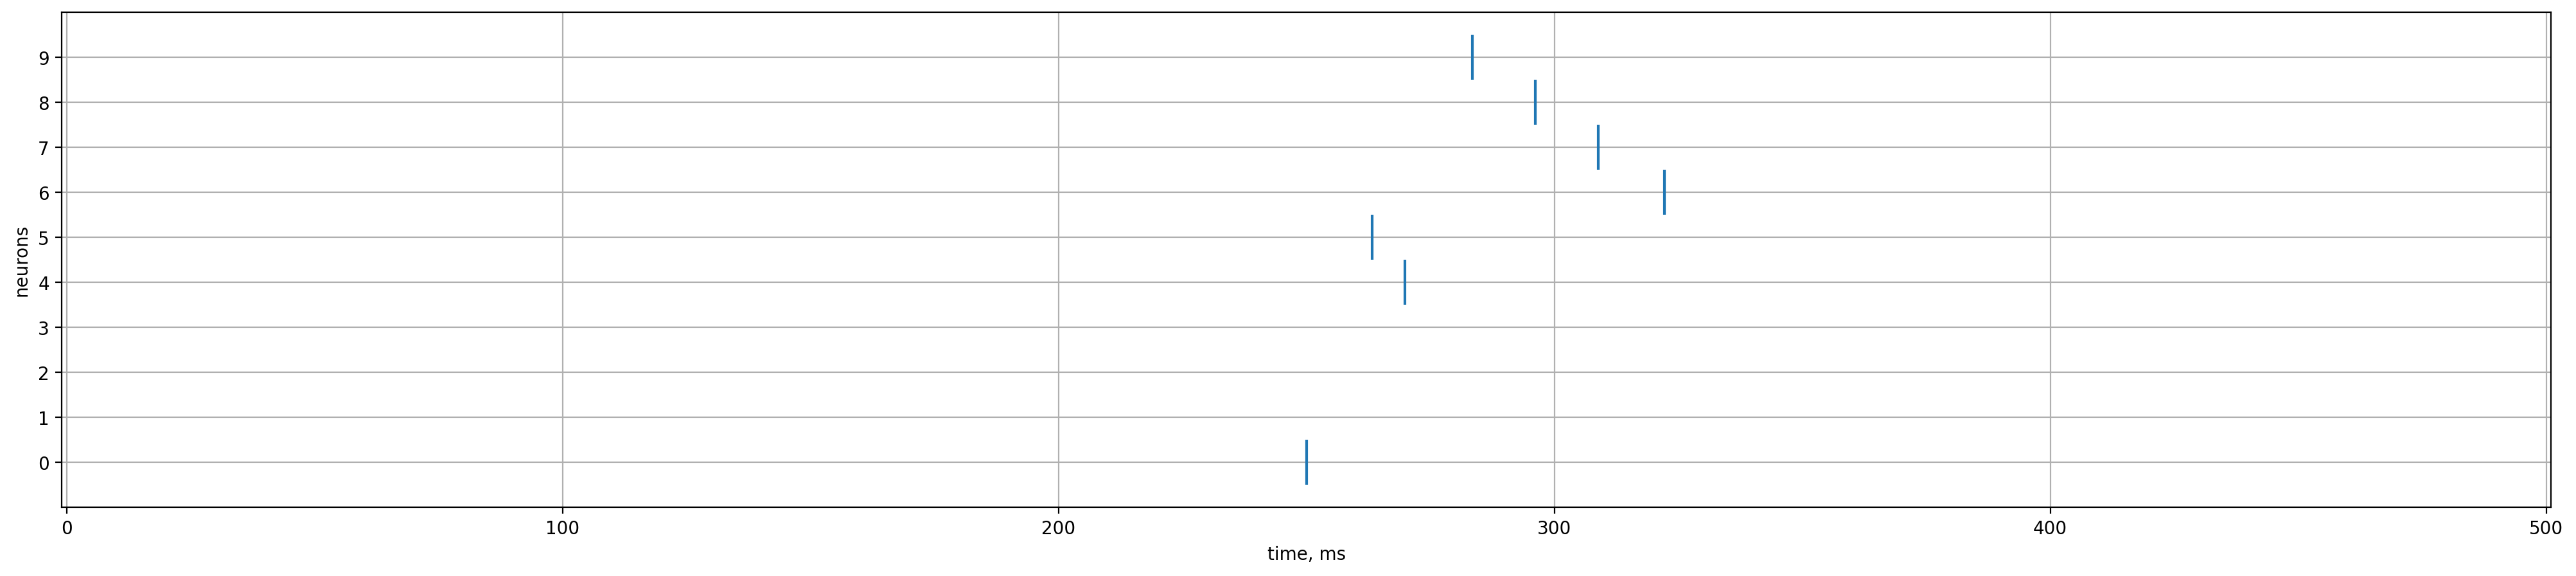

In [8]:
time = 500


clone.syn_by_edge[1,6].w = 0
clone.syn_by_edge[2,7].w = 0
clone.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
clone.set_rule_to_all(None)
switch_order(clone, [0, 4])
gatherer = Gatherer(clone)
for i in range(int(time / res)):
    clone.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

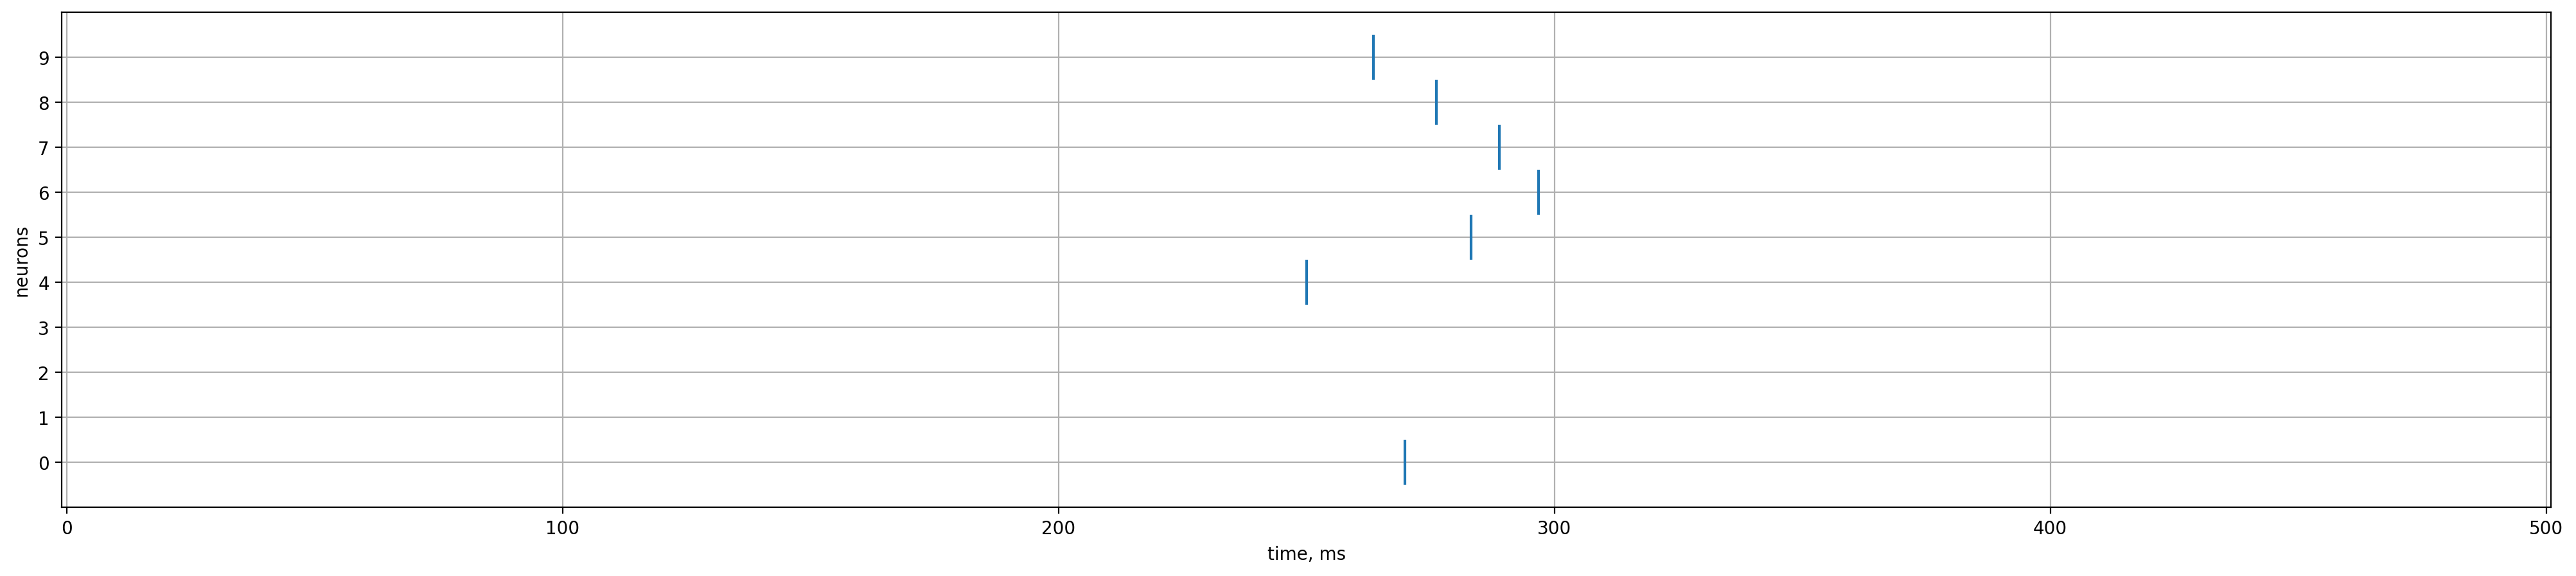

In [9]:
time = 500

# clone.remove_neurons([1,2,3])
# clone.syn_by_edge[2,7].w = 0
# clone.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
clone[1].turn_off()
clone[2].turn_off()
clone[3].turn_off()
clone.set_rule_to_all(None)
switch_order(clone, [0, 4])
gatherer = Gatherer(clone)
for i in range(int(time / res)):
    clone.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)